## continuum normalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import wobble

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
starname = 'barnards'
orders = [7]
epochs = np.arange(30)
K_star = 0
K_t = 0
verbose = True
r = 0 # specific order to regularize in tests
min_flux = 1.
max_norm_flux = 2.
padding = 2
min_snr = 4.

In [3]:
data = wobble.Data(starname+'_e2ds.hdf5', filepath='data/', orders=orders, epochs=epochs, 
                   min_snr=min_snr)

[7.39166977e+01 3.93766356e-03 3.04123085e+01 1.68455330e+00
 2.21033705e+01 1.36402253e+01 2.65333135e+00 2.45659882e+01
 2.89521180e+00 9.03372986e+01 4.99090156e+00 1.26634026e+01
 5.29804573e+00 2.15918458e+00 2.13239599e+01 2.02477012e+00
 5.93321088e-01 4.03152837e+01 2.41516589e+01 7.41042606e+00
 3.25545535e+00 1.82080114e+01 5.64665098e+01 7.24095894e+00
 1.28487548e+01 1.65592158e+01 3.12176229e-01 9.66089369e+00
 4.81058640e+00 8.04833606e+00]


In [4]:
data.epochs

array([ 0,  2,  4,  7,  9, 14, 17, 18, 21, 22, 25])

In [5]:
np.sqrt(np.nanmean(data.ivars, axis=(0,2)))

array([8.59748206, 5.51473557, 4.70142218, 4.9564088 , 9.50318275,
       4.61778734, 6.34943176, 4.91443373, 4.26708465, 7.51442013,
       4.06930164])

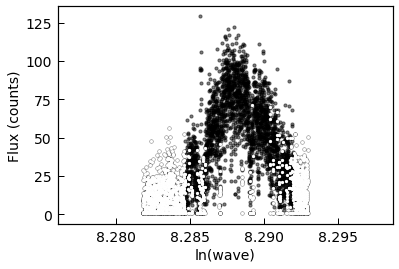

In [6]:
n = 3
plt.scatter(data.xs[0][n], data.fluxes[0][n], marker=".", alpha=0.5, c='k', label='data', s=40)
mask = data.ivars[0][n] <= 1.e-8
plt.scatter(data.xs[0][n][mask], data.fluxes[0][n][mask], marker=".", alpha=1., c='white', s=20)
plt.ylabel('Flux (counts)', fontsize=14)
plt.xlabel('ln(wave)', fontsize=14);